FINAL PROJECT "CUSTOMER_CHURN_Telecom"

BUSINESS UNDERSTANDING

Customer churn or customer attrition is the phenomenon where customers of a business no longer purchase or interact with the business. A high churn means that higher number of customers no longer want to purchase goods and services from the business. Customer churn rate or customer attrition rate is the mathematical calculation of the percentage of customers who are not likely to make another purchase from a business.
Customer churn happens when customers decide to not continue purchasing products/services from an organization and end their association. It is an integral parameter for the organization since acquiring a new customer could cost almost 7 times more than retaining an existing customer.



THE IMPORTANT OF CUSTOMER CHURN

Acquiring New Customer the cost is more expensive than maintain the loyal customer.
The company not only focus on loyal customer but also maintain new customer for being loyal
Predicting customer churn is essential to know the pattern of customer and give the best for them based on their needs.
To know the process the customer miss the point and make customer churn to another company.
To know the process the customer miss the point and make customer churn to another company.
There are various factors which lead to this decision and its important for organizations to understand each and every factor so that customers can be convinced to stay and keep making purchases.

PURPOSE OF DATASET

Attract the new customer and maintained the customer
Analyze and predict the customer data

In [126]:
# import sklearn library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
# import statistic library
from scipy import stats
import statsmodels.api as sm

In [127]:
#preparation
import google.colab as gc
gc.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [128]:
!pwd

/content/drive/My Drive/Bootcamp Data Science/Day 29_ Telecom Customer Churn


In [129]:
# change folder
%cd '/content/drive/My Drive/Bootcamp Data Science/Day 29_ Telecom Customer Churn'

/content/drive/My Drive/Bootcamp Data Science/Day 29_ Telecom Customer Churn


In [130]:
!ls

 count_plot.png
'Customer Churn_Yoga Aditia Nugroho.ipynb'
'Dibimbing Day 27 - Final Project.pdf'
'telecom_users - telecom_users.csv'
'Yoga Aditia Nugroho - Final Project (1).gslides'
'Yoga Aditia Nugroho - Final Project.gslides'
'Yoga Aditia Nugroho_Final_Project_Logistic Regression.ipynb'


READING THE DATA

In [131]:
#Reading the data
df = pd.read_csv('telecom_users - telecom_users.csv')
df.head(10)

,Unnamed: 0,customerID,gender,Age,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,CashBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,32,Yes,Yes,72 month,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Yes,Credit card (automatic),24.1,1734.65,No
1,4528,9688-YGXVR,NaN,25,No,No,44 month,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,No,Credit card (automatic),88.15,3973.20,No
2,6344,9286-DOJGF,Female,66,Yes,No,38 month,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,No,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,35,No,No,4 month,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,No,Electronic check,55.9,238.50,No
4,432,2181-UAESM,Male,26,No,No,2 month,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Yes,Electronic check,53.45,119.50,No
5,2215,4312-GVYNH,Female,30,Yes,No,70 month,No,NaN,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Yes,No,Bank transfer (automatic),49.85,3370.20,No
6,5260,2495-KZNFB,Female,20,No,No,33 month,Yes,Yes,Fiber optic,Yes,No,No,No,No,Yes,Month-to-month,Yes,No,Electronic check,90.65,2989.60,No
7,6001,4367-NHWMM,Female,23,No,No,1 month,No,NaN,DSL,No,No,No,No,No,No,Month-to-month,Yes,No,Mailed check,24.9,24.90,No
8,1480,8898-KASCD,Male,23,No,No,39 month,No,NaN,DSL,No,No,Yes,Yes,No,No,One year,No,Yes,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,70,No,No,55 month,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,No,Electronic check,116.5,6382.55,No


In [132]:
df.shape

(5986, 23)

In [133]:
# check target data
df['Churn']

0        No
1        No
2       Yes
3        No
4        No
       ... 
5981    Yes
5982     No
5983     No
5984    Yes
5985     No
Name: Churn, Length: 5986, dtype: object

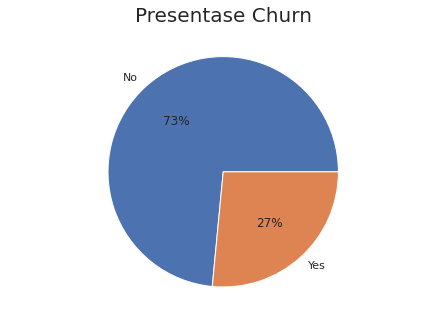

In [134]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
churn = df.Churn.value_counts()
ax.pie(churn, labels=labels, autopct='%.0f%%')
plt.title("Presentase Churn", fontsize=20)
plt.show()

EDA

In [135]:
#Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5984 non-null   object 
 3   Age               5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   object 
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5396 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [136]:
df.isnull().sum()

Unnamed: 0            0
customerID            0
gender                2
Age                   0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       590
InternetService       0
OnlineSecurity        0
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
CashBilling           0
PaymentMethod         0
MonthlyCharges        0
TotalCharges         10
Churn                 0
dtype: int64

In [137]:
df.gender.value_counts()

Male      3049
Female    2935
Name: gender, dtype: int64

In [138]:
df.gender = df.gender.fillna('unknown')

In [139]:
df.Age.value_counts()

26    304
34    297
20    295
21    288
32    287
33    285
19    281
28    280
31    280
25    279
24    278
18    276
22    276
29    273
23    267
35    267
27    260
30    247
64     64
69     59
60     58
66     50
53     48
63     48
68     47
67     47
62     47
52     46
54     45
57     44
70     43
51     42
59     42
50     41
56     41
58     41
61     40
65     39
55     34
Name: Age, dtype: int64

In [140]:
df.Age = df.Age.fillna('unknown')

In [141]:
df.Partner.value_counts()

No     3082
Yes    2904
Name: Partner, dtype: int64

In [142]:
df.Partner = df.Partner.fillna('unknown')

In [143]:
df.Dependents.value_counts()

No     4195
Yes    1791
Name: Dependents, dtype: int64

In [144]:
df.Dependents = df.Dependents.fillna('unknown')

In [145]:
df.tenure.value_counts()

1 month     510
72 month    308
2 month     194
3 month     169
4 month     154
           ... 
44 month     47
45 month     47
39 month     44
36 month     43
0 month      10
Name: tenure, Length: 73, dtype: int64

In [146]:
df['tenure'] = df['tenure'].map(lambda x: x.rstrip('month'))
df.tenure

0       72 
1       44 
2       38 
3        4 
4        2 
       ... 
5981     1 
5982    23 
5983    12 
5984    12 
5985    26 
Name: tenure, Length: 5986, dtype: object

In [147]:
df.tenure = df.tenure.fillna('unknown')

In [148]:
df.tenure.dtype

dtype('O')

In [149]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

In [150]:
df.PhoneService.value_counts()

Yes    5396
No      590
Name: PhoneService, dtype: int64

In [151]:
df.PhoneService = df.PhoneService.fillna('unknown')

In [152]:
df.MultipleLines.value_counts()

No     2848
Yes    2548
Name: MultipleLines, dtype: int64

In [153]:
df.MultipleLines = df.MultipleLines.fillna('unknown')

In [154]:
df.InternetService.value_counts()

Fiber optic                2627
DSL                        1980
No                         1292
Digital Subscriber Line      87
Name: InternetService, dtype: int64

In [155]:
df.InternetService = df.InternetService.fillna('unknown')

In [156]:
df.OnlineSecurity.value_counts()

No                     2982
Yes                    1713
No internet service    1291
Name: OnlineSecurity, dtype: int64

In [157]:
df.OnlineSecurity = df.OnlineSecurity.fillna('unknown')

In [158]:
df.OnlineBackup.value_counts()

No                     2605
Yes                    2090
No internet service    1291
Name: OnlineBackup, dtype: int64

In [159]:
df.OnlineBackup = df.OnlineBackup.fillna('unknown')

In [160]:
df.DeviceProtection.value_counts()

No                     2640
Yes                    2055
No internet service    1291
Name: DeviceProtection, dtype: int64

In [161]:
df.DeviceProtection = df.DeviceProtection.fillna('unknown')

In [162]:
df.TechSupport.value_counts()

No                     2960
Yes                    1735
No internet service    1291
Name: TechSupport, dtype: int64

In [163]:
df.TechSupport = df.TechSupport.fillna('unknown')

In [164]:
df.StreamingTV.value_counts()

No                     2389
Yes                    2306
No internet service    1291
Name: StreamingTV, dtype: int64

In [165]:
df.StreamingTV = df.StreamingTV.fillna('unknown')

In [166]:
df.StreamingMovies.value_counts()

No                     2356
Yes                    2339
No internet service    1291
Name: StreamingMovies, dtype: int64

In [167]:
df.StreamingMovies = df.StreamingMovies.fillna('unknown')

In [168]:
df.Contract.value_counts()

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [169]:
df.Contract = df.Contract.fillna('unknown')

In [170]:
df.PaperlessBilling.value_counts()

Yes    3528
No     2458
Name: PaperlessBilling, dtype: int64

In [171]:
df.PaperlessBilling = df.PaperlessBilling.fillna('unknown')

In [172]:
df.CashBilling.value_counts()

No     3528
Yes    2458
Name: CashBilling, dtype: int64

In [173]:
df.CashBilling = df.CashBilling.fillna('unknown')

In [174]:
df.PaymentMethod.value_counts()

Electronic check             2006
Mailed check                 1369
Bank transfer (automatic)    1306
Credit card (automatic)      1302
Bank transfer                   2
Credit card                     1
Name: PaymentMethod, dtype: int64

In [175]:
df.PaymentMethod = df.PaymentMethod.fillna('unknown')

In [176]:
df.MonthlyCharges.value_counts()

20.05    50
19.85    40
19.7     39
19.55    37
19.95    36
         ..
73.7      1
67.7      1
78.55     1
33.15     1
82.4      1
Name: MonthlyCharges, Length: 1527, dtype: int64

In [177]:
df.MonthlyCharges = df.MonthlyCharges.fillna('unknown')

In [178]:
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [179]:
df.TotalCharges.value_counts()

20.20      10
19.75       8
19.55       7
20.05       6
19.90       6
           ..
646.85      1
1286.00     1
102.75      1
178.50      1
25.75       1
Name: TotalCharges, Length: 5610, dtype: int64

In [180]:
df.TotalCharges = df.TotalCharges.fillna('unknown')

In [187]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [188]:
df.Churn.value_counts()

No     4399
Yes    1587
Name: Churn, dtype: int64

In [189]:
df.Churn = df.Churn.fillna('unknown')

In [190]:
df.isnull().sum()

gender               0
Age                  0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
CashBilling          0
PaymentMethod        0
MonthlyCharges       6
TotalCharges        10
Churn                0
dtype: int64

In [191]:
df.describe()

,Age,tenure,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000,5980.000000,5976.000000
mean,31.944704,32.468760,64.838144,2298.060617
std,13.563408,24.516391,30.101288,2274.127165
min,18.000000,0.000000,18.250000,18.800000
25%,23.000000,9.000000,35.750000,404.312500
50%,28.000000,29.000000,70.400000,1412.150000
75%,34.000000,56.000000,89.900000,3846.962500
max,70.000000,72.000000,118.750000,8684.800000


In [193]:
#df.drop('Unnamed: 0', axis=1, inplace = True)

KeyError: ignored

In [186]:
#df.drop('customerID', axis=1, inplace = True)

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   Age               5986 non-null   int64  
 2   Partner           5986 non-null   object 
 3   Dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   PhoneService      5986 non-null   object 
 6   MultipleLines     5986 non-null   object 
 7   InternetService   5986 non-null   object 
 8   OnlineSecurity    5986 non-null   object 
 9   OnlineBackup      5986 non-null   object 
 10  DeviceProtection  5986 non-null   object 
 11  TechSupport       5986 non-null   object 
 12  StreamingTV       5986 non-null   object 
 13  StreamingMovies   5986 non-null   object 
 14  Contract          5986 non-null   object 
 15  PaperlessBilling  5986 non-null   object 
 16  CashBilling       5986 non-null   object 


In [195]:
#Removing Missing Data
df.dropna(inplace = True)

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5970 entries, 0 to 5984
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5970 non-null   object 
 1   Age               5970 non-null   int64  
 2   Partner           5970 non-null   object 
 3   Dependents        5970 non-null   object 
 4   tenure            5970 non-null   int64  
 5   PhoneService      5970 non-null   object 
 6   MultipleLines     5970 non-null   object 
 7   InternetService   5970 non-null   object 
 8   OnlineSecurity    5970 non-null   object 
 9   OnlineBackup      5970 non-null   object 
 10  DeviceProtection  5970 non-null   object 
 11  TechSupport       5970 non-null   object 
 12  StreamingTV       5970 non-null   object 
 13  StreamingMovies   5970 non-null   object 
 14  Contract          5970 non-null   object 
 15  PaperlessBilling  5970 non-null   object 
 16  CashBilling       5970 non-null   object 


In [197]:
df.isnull().sum()

gender              0
Age                 0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
CashBilling         0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# **VISUALISATION**

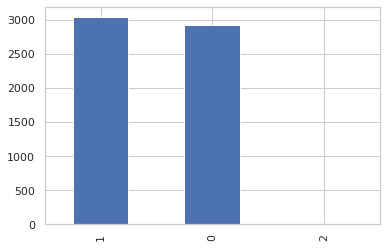

In [198]:
df.gender = df.gender.map({'Female':0,'Male':1, 'unknown':2});
df.gender.value_counts().plot(kind='bar')

In [199]:
df.gender.value_counts()

1    3040
0    2928
2       2
Name: gender, dtype: int64

In [200]:
df.Age.value_counts()

26    301
34    296
20    293
32    287
21    286
33    283
28    280
19    280
31    279
25    279
24    278
22    276
18    274
29    273
35    267
23    266
27    260
30    246
64     64
69     59
60     58
66     50
53     48
63     48
68     47
62     47
67     47
52     46
54     45
57     44
70     43
51     42
59     42
58     41
50     41
56     41
61     40
65     39
55     34
Name: Age, dtype: int64

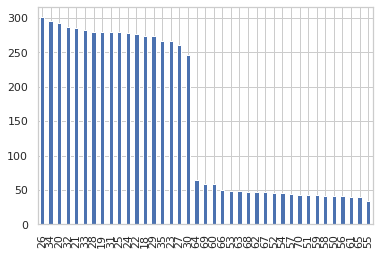

In [201]:
df.Age.value_counts().plot(kind='bar');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


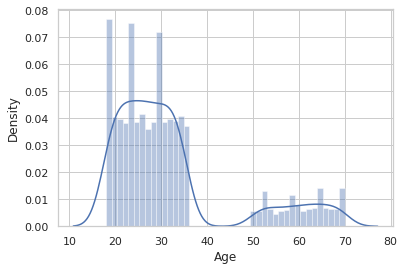

In [202]:
sns.distplot(df['Age'])

In [203]:
df.Partner = df.Partner.map({'No':0,'Yes':1, 'unknown':2})

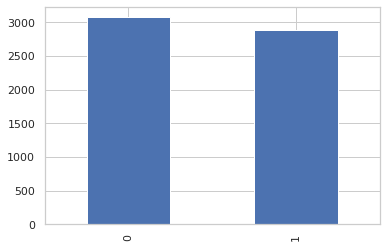

In [204]:
df.Partner.value_counts();
df.Partner.value_counts().plot(kind='bar');

In [205]:
df.Dependents = df.Dependents.map({'No':0,'Yes':1, 'unknown':2})

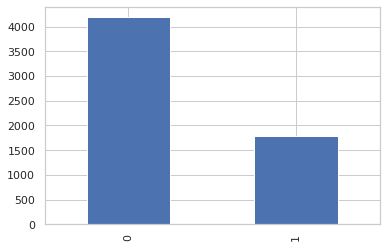

In [206]:
df.Dependents.value_counts().plot(kind='bar')

In [207]:
df.tenure.value_counts()

1     510
72    308
2     194
3     169
4     153
     ... 
38     49
44     47
45     47
39     44
36     43
Name: tenure, Length: 72, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


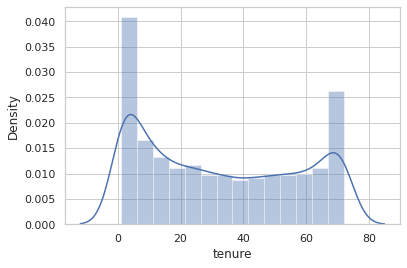

In [208]:
sns.distplot(df['tenure'])

In [210]:
df.PhoneService.value_counts()

1    5382
0     588
Name: PhoneService, dtype: int64

In [209]:
df.PhoneService = df.PhoneService.map({'No':0,'Yes':1})

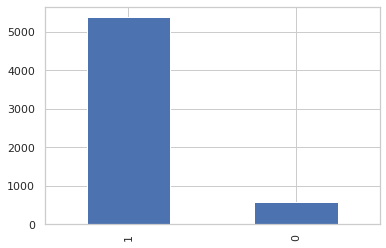

In [211]:
df.PhoneService.value_counts().plot(kind='bar')

In [212]:
df.MultipleLines.value_counts()

No         2838
Yes        2544
unknown     588
Name: MultipleLines, dtype: int64

In [213]:
df.MultipleLines = df.MultipleLines.map({'No':0,'Yes':1, 'unknown':2})

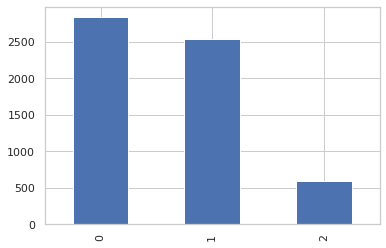

In [214]:
df.MultipleLines.value_counts().plot(kind='bar')

In [215]:
df.InternetService.value_counts()

Fiber optic                2626
DSL                        1978
No                         1281
Digital Subscriber Line      85
Name: InternetService, dtype: int64

In [216]:
df.InternetService = df.InternetService.map({'No':0,'Fiber optic':1, 'DSL':2, 'Digital Subscriber Line':3})

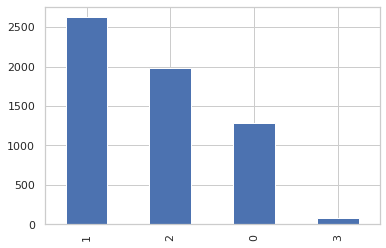

In [217]:
df.InternetService.value_counts().plot(kind='bar')

In [218]:
df.OnlineSecurity.value_counts()

No                     2981
Yes                    1709
No internet service    1280
Name: OnlineSecurity, dtype: int64

In [219]:
df.OnlineSecurity = df.OnlineSecurity.map({'No':0,'Yes':1, 'No internet service':2})

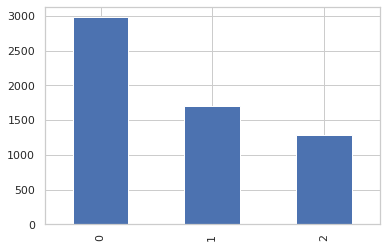

In [220]:
df.OnlineSecurity.value_counts().plot(kind='bar')

In [221]:
df.OnlineBackup.value_counts()

No                     2603
Yes                    2087
No internet service    1280
Name: OnlineBackup, dtype: int64

In [222]:
df.OnlineBackup = df.OnlineBackup.map({'No':0,'Yes':1, 'No internet service':2})

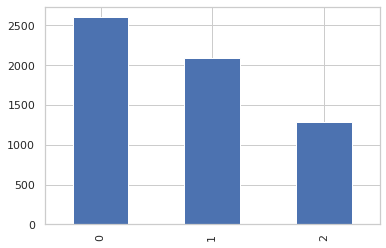

In [223]:
df.OnlineBackup.value_counts().plot(kind='bar')

In [224]:
df.DeviceProtection.value_counts()

No                     2638
Yes                    2052
No internet service    1280
Name: DeviceProtection, dtype: int64

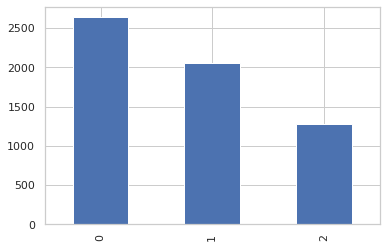

In [225]:
df.DeviceProtection = df.DeviceProtection.map({'No':0,'Yes':1, 'No internet service':2});
df.DeviceProtection.value_counts().plot(kind='bar')

In [226]:
df.TechSupport.value_counts()

No                     2958
Yes                    1732
No internet service    1280
Name: TechSupport, dtype: int64

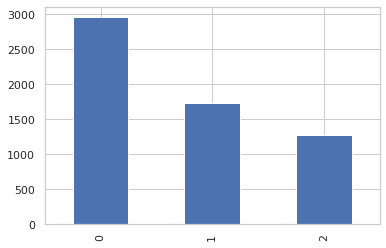

In [227]:
df.TechSupport = df.TechSupport.map({'No':0,'Yes':1, 'No internet service':2});
df.TechSupport.value_counts().plot(kind='bar')

In [228]:
df.StreamingTV.value_counts()

No                     2387
Yes                    2303
No internet service    1280
Name: StreamingTV, dtype: int64

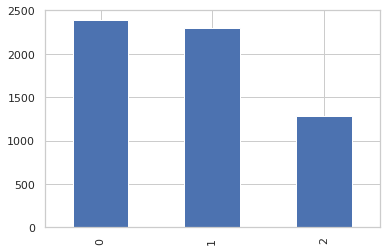

In [229]:
df.StreamingTV = df.StreamingTV.map({'No':0,'Yes':1, 'No internet service':2});
df.StreamingTV.value_counts().plot(kind='bar')

In [230]:
df.StreamingMovies.value_counts()

No                     2352
Yes                    2338
No internet service    1280
Name: StreamingMovies, dtype: int64

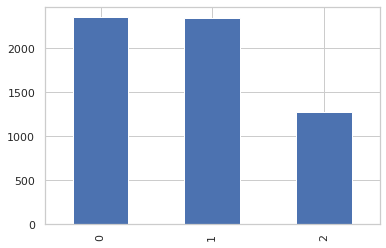

In [231]:
df.StreamingMovies = df.StreamingMovies.map({'No':0,'Yes':1, 'No internet service':2});
df.StreamingMovies.value_counts().plot(kind='bar')

In [232]:
df.Contract.value_counts()

Month-to-month    3266
Two year          1431
One year          1273
Name: Contract, dtype: int64

In [233]:
df.Contract = df.Contract.map({'Month-to-month':0,'One year':1, 'Two year':2})

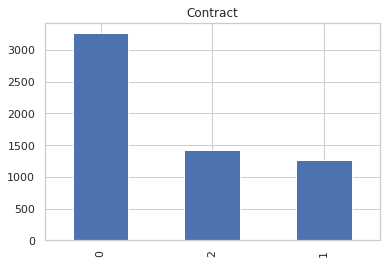

In [234]:
df.Contract.value_counts().plot(kind='bar');
plt.title('Contract');

In [235]:
df.PaperlessBilling.value_counts()

Yes    3523
No     2447
Name: PaperlessBilling, dtype: int64

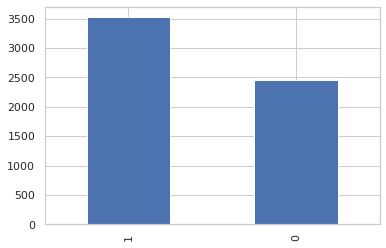

In [236]:
df.PaperlessBilling = df.PaperlessBilling.map({'No':0,'Yes':1});
df.PaperlessBilling.value_counts().plot(kind='bar')

In [237]:
df.CashBilling.value_counts()

No     3523
Yes    2447
Name: CashBilling, dtype: int64

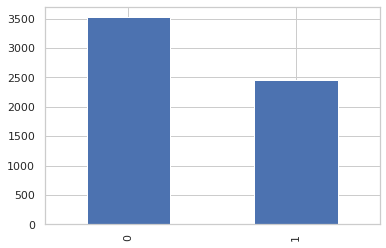

In [238]:
df.CashBilling = df.CashBilling.map({'No':0,'Yes':1});
df.CashBilling.value_counts().plot(kind='bar')

In [239]:
df.PaymentMethod.value_counts()

Electronic check             2004
Mailed check                 1360
Bank transfer (automatic)    1304
Credit card (automatic)      1299
Bank transfer                   2
Credit card                     1
Name: PaymentMethod, dtype: int64

In [240]:
df.PaymentMethod = df.PaymentMethod.map({'Electronic check':0,'Mailed check':1, 'Bank Transfer (automatic)':2, 'Credit card (automatic)':3, 'Bank transfer':4, 'Credit card':5})

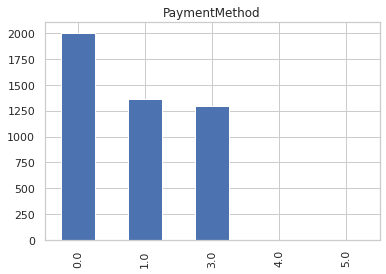

In [241]:
df.PaymentMethod.value_counts().plot(kind='bar');
plt.title('PaymentMethod');

In [242]:
df.MonthlyCharges.value_counts()

20.05     50
19.85     39
19.70     38
19.55     37
19.95     36
          ..
113.05     1
67.20      1
83.45      1
65.90      1
51.65      1
Name: MonthlyCharges, Length: 1525, dtype: int64

In [243]:
df.TotalCharges.value_counts()

20.20      10
19.75       8
19.55       7
20.05       6
19.90       6
           ..
702.00      1
417.75      1
646.85      1
1286.00     1
25.75       1
Name: TotalCharges, Length: 5605, dtype: int64

In [244]:
df.Churn.value_counts()

No     4383
Yes    1587
Name: Churn, dtype: int64

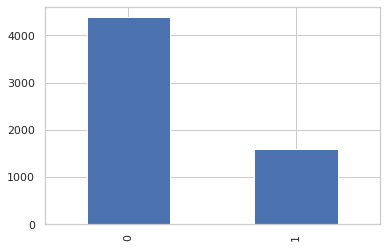

In [245]:
df.Churn = df.Churn.map({'No':0,'Yes':1});
df.Churn.value_counts().plot(kind='bar')

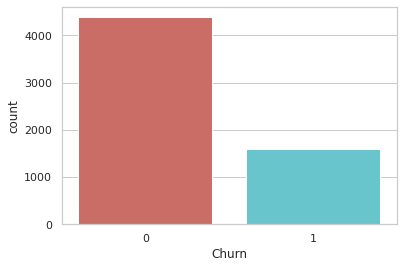

percentage of no churn is 73.41708542713567
percentage of churn 26.58291457286432


<Figure size 432x288 with 0 Axes>

In [277]:
sns.countplot(x ='Churn',data=df,palette ='hls')
plt.show()
plt.savefig('count_plot')
count_no_churn = len(df[df['Churn']==0])
count_churn = len(df[df['Churn']==1])
pct_of_no_churn = count_no_churn/(count_no_churn+count_churn)
print("percentage of no churn is", pct_of_no_churn*100)
pct_of_churn = count_churn/(count_no_churn+count_churn)
print("percentage of churn", pct_of_churn*100)

In [322]:
df.Age.median()

28.0

In [323]:
df.median()

gender                   1.00
Age                     28.00
Partner                  0.00
Dependents               0.00
tenure                  29.00
PhoneService             1.00
MultipleLines            1.00
InternetService          1.00
Contract                 0.00
PaperlessBilling         1.00
CashBilling              0.00
PaymentMethod            1.00
MonthlyCharges          70.45
TotalCharges          1413.60
Churn                    0.00
gender_0                 0.00
gender_1                 1.00
gender_2                 0.00
Partner_0                1.00
Partner_1                0.00
Dependents_0             1.00
Dependents_1             0.00
PhoneService_0           0.00
PhoneService_1           1.00
MultipleLines_0          0.00
MultipleLines_1          0.00
MultipleLines_2          0.00
InternetService_0        0.00
InternetService_1        0.00
InternetService_2        0.00
InternetService_3        0.00
Contract_0               1.00
Contract_1               0.00
Contract_2

In [248]:
df.groupby('Churn').mean()

,gender,Age,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,CashBilling,PaymentMethod,MonthlyCharges,TotalCharges
Churn,,,,,,,,,,,,,,,,,,,,
0,0.512891,30.782113,0.528633,0.341775,37.709103,0.899840,0.615788,1.126169,0.872690,0.912389,0.902806,0.873374,0.907141,0.913530,0.890942,0.534337,0.465663,1.335251,61.521834,2571.163415
1,0.501575,35.226213,0.362949,0.177064,18.246377,0.906112,0.643352,1.197858,0.279773,0.408318,0.412728,0.292376,0.558916,0.563327,0.144928,0.744171,0.255829,0.631232,74.164871,1550.701985


In [249]:
cat_vars=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','CashBilling','PaymentMethod']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1
cat_vars=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','CashBilling','PaymentMethod']
df_vars=df.columns.values.tolist()
to_keep=[i for i in df_vars if i not in cat_vars]

In [250]:
df_final=df[to_keep]
df_final.columns.values

array(['Age', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_0', 'gender_1', 'gender_2', 'Partner_0', 'Partner_1',
       'Dependents_0', 'Dependents_1', 'PhoneService_0', 'PhoneService_1',
       'MultipleLines_0', 'MultipleLines_1', 'MultipleLines_2',
       'InternetService_0', 'InternetService_1', 'InternetService_2',
       'InternetService_3', 'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_2', 'OnlineBackup_0', 'OnlineBackup_1',
       'OnlineBackup_2', 'DeviceProtection_0', 'DeviceProtection_1',
       'DeviceProtection_2', 'TechSupport_0', 'TechSupport_1',
       'TechSupport_2', 'StreamingTV_0', 'StreamingTV_1', 'StreamingTV_2',
       'StreamingMovies_0', 'StreamingMovies_1', 'StreamingMovies_2',
       'Contract_0', 'Contract_1', 'Contract_2', 'PaperlessBilling_0',
       'PaperlessBilling_1', 'CashBilling_0', 'CashBilling_1',
       'PaymentMethod_0.0', 'PaymentMethod_1.0', 'PaymentMethod_3.0',
       'PaymentMethod_4.0', 'PaymentMethod_

In [256]:
X = df_final.loc[:, df_final.columns != 'Churn']
y = df_final.loc[:, df_final.columns == 'Churn']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Churn'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no churn in oversampled data",len(os_data_y[os_data_y['Churn']==0]))
print("Number of churn",len(os_data_y[os_data_y['Churn']==1]))
print("Proportion of no churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==0])/len(os_data_X))
print("Proportion of churn data in oversampled data is ",len(os_data_y[os_data_y['Churn']==1])/len(os_data_X))

length of oversampled data is  6162
Number of no churn in oversampled data 3081
Number of churn 3081
Proportion of no churn data in oversampled data is  0.5
Proportion of churn data in oversampled data is  0.5


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [257]:
df_final_vars=df_final.columns.values.tolist()
y=['Churn']
X=[i for i in df_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[False False False False False  True False False False False False False
  True False False  True False  True  True  True  True  True False  True
 False False  True False False  True False False  True False False  True
  True False  True False  True  True False False  True  True False False
  True False]
[28 14 21 30 26  1 31 17 20  7 18  5  1 12 13  1  8  1  1  1  1  1  2  1
 16 10  1 19  6  1  3  9  1 22  4  1  1 11  1 29  1  1 25 27  1  1 24 15
  1 23]


In [313]:
cols=['gender_0','gender_1','Partner_0', 'Partner_1', 'Contract_0', 'Contract_1', 'Contract_2', 'InternetService_0', 'InternetService_1', 'InternetService_2','InternetService_3'] 
#feature_drop = ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
#df = df.drop(feature_drop, axis=1)
X=os_data_X[cols]
y=os_data_y['Churn']

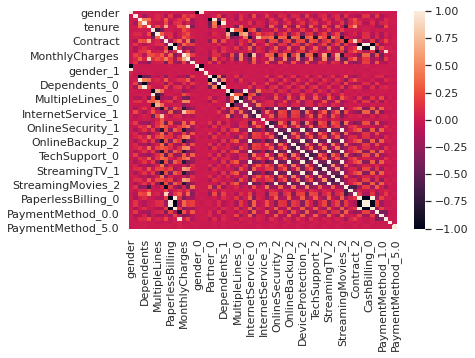

In [302]:
sns.heatmap(df.corr());
feature_drop = ['OnlineSecurity_0', 'OnlineSecurity_1','OnlineSecurity_2', 'OnlineBackup_0', 'OnlineBackup_1','OnlineBackup_2', 'DeviceProtection_0', 'DeviceProtection_1','DeviceProtection_2', 'TechSupport_0', 'TechSupport_1','TechSupport_2', 'StreamingTV_0', 'StreamingTV_1', 'StreamingTV_2','StreamingMovies_0', 'StreamingMovies_1', 'StreamingMovies_2']
df = df.drop(feature_drop, axis=1)

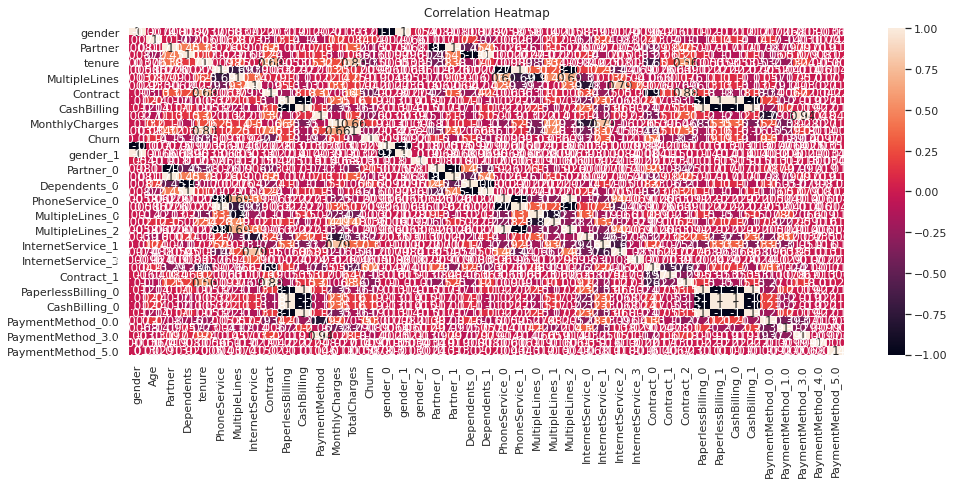

In [303]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [314]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.520997
         Iterations: 35
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.248    
Dependent Variable:       Churn                 AIC:                   6438.7723
Date:                     2021-07-31 05:55      BIC:                   6499.3077
No. Observations:         6162                  Log-Likelihood:        -3210.4  
Df Model:                 8                     LL-Null:               -4271.2  
Df Residuals:             6153                  LLR p-value:           0.0000   
Converged:                0.0000                Scale:                 1.0000   
No. Iterations:           35.0000                                               
--------------------------------------------------------------------------------
                   Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
----------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [315]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [316]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.74


In [317]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[304 156]
 [ 88 377]]


In [318]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.66      0.71       460
           1       0.71      0.81      0.76       465

    accuracy                           0.74       925
   macro avg       0.74      0.74      0.73       925
weighted avg       0.74      0.74      0.73       925



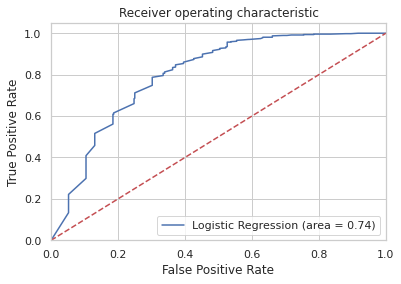

In [319]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

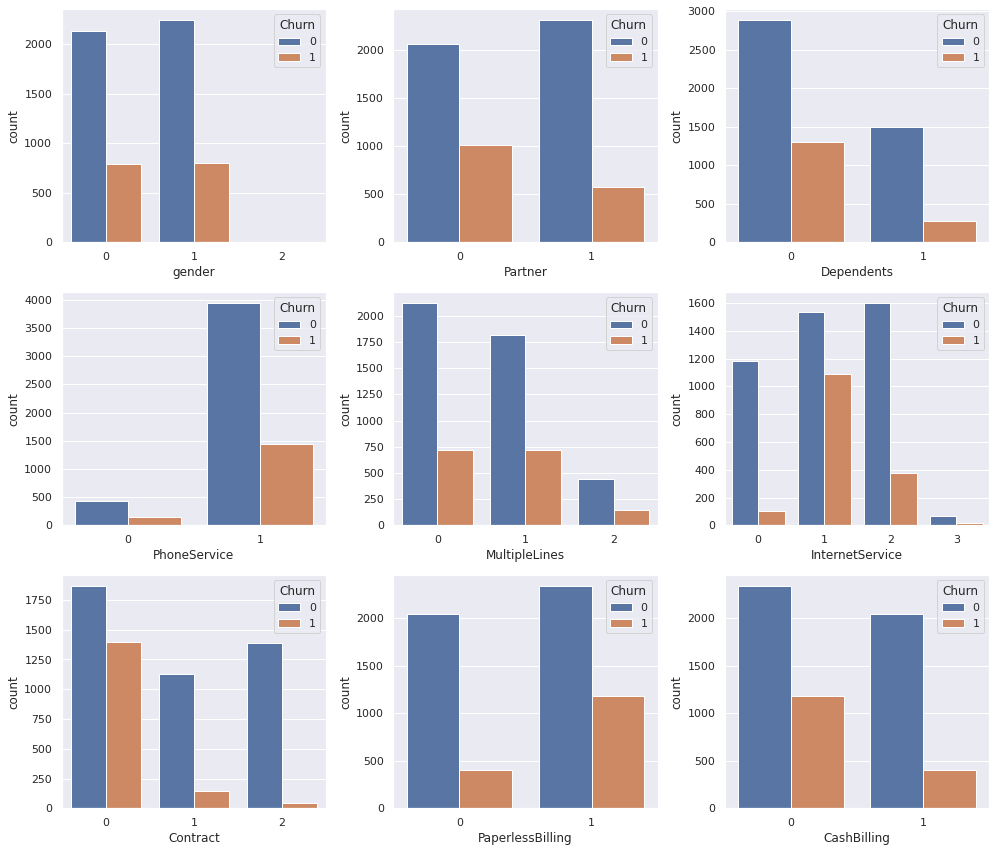

In [320]:
sns.set(style='darkgrid')
# Your code goes here
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df, x='Dependents', hue='Churn', ax=ax[0][2])
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df, x='MultipleLines', hue='Churn', ax=ax[1][1])
sns.countplot(data=df, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df, x='Contract', hue='Churn', ax=ax[2][0])
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
sns.countplot(data=df, x='CashBilling', hue='Churn', ax=ax[2][2])
plt.tight_layout()
plt.show()